#Heart Disease Prediction

Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [6]:
path = 'https://raw.githubusercontent.com/absiddik7/Datasets/main/heart_2020_cleaned.csv'
df = pd.read_csv(path)
df_c = df.copy() # keep a copy of the df

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

##Exploratory Data Analysis

**Heart Disease Distribution**

In [7]:
disease = df.groupby('HeartDisease').size()
disease

HeartDisease
No     292422
Yes     27373
dtype: int64

Text(0.5, 1.0, 'Hear Disease')

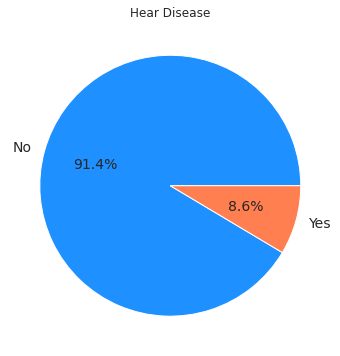

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.pie(disease,labels=['No', 'Yes'],autopct='%1.1f%%', textprops={"fontsize": 14}, colors=['dodgerblue','coral'])
plt.title('Hear Disease')

**Insights**


*   Most people doesn't have heart disease
*   Dataset is highly unbalanced



**Gender Distribution** 

Text(0.5, 1.0, 'Gender')

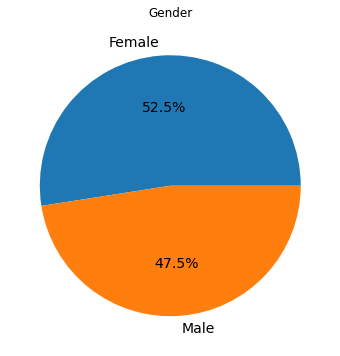

In [9]:
plt.figure(figsize=(10,6))
gender = df.groupby('Sex').size()
plt.pie(gender,labels=['Female', 'Male'],
        autopct='%1.1f%%', textprops={"fontsize": 14})
plt.title('Gender')

**Insights**


*   Majority are Female



**Race Distribution**

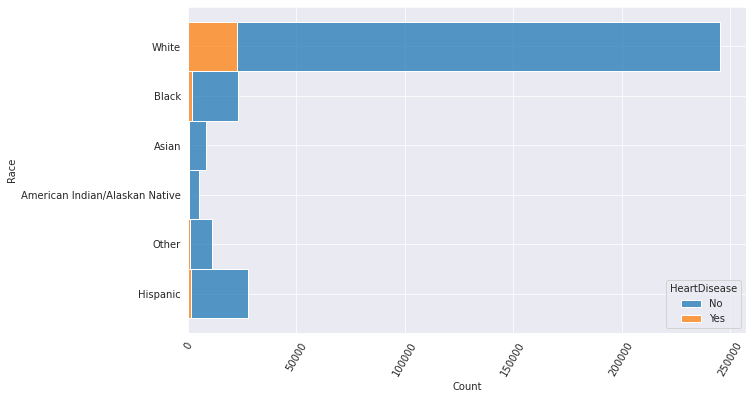

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(y=df['Race'],hue=df["HeartDisease"], multiple="stack")
plt.xticks(rotation=60)
plt.show()

**Insights**


*   Majority peoples are White
*   Also, most heart disease patients are white people








**Age Category wise heart disease stats**

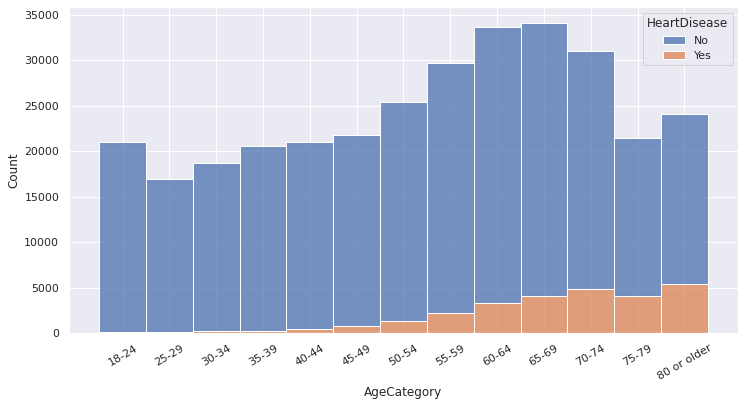

In [ ]:
adata = df.sort_values(by=['AgeCategory'],ascending = True)
sns.histplot(data=adata, x="AgeCategory", hue="HeartDisease", multiple="stack")
plt.xticks(rotation=30)
plt.show()

**Insights**


*   People has heart disease are mostly old people




**Peoples describe their general health condition**

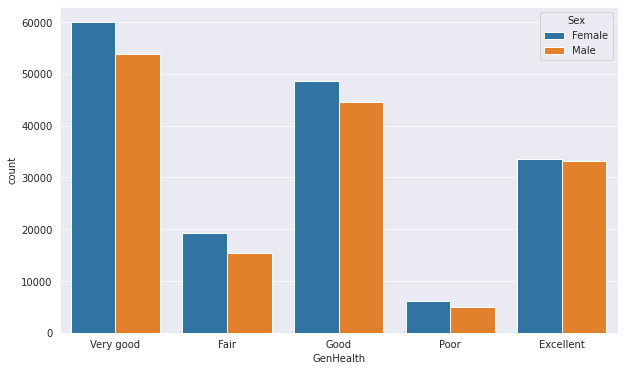

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'GenHealth',hue='Sex')

**Insights**

*  Most of the people describe their general health as Very good and the ration of females are higher than male. 




##Data Preparation

Encoding Categorical Values

In [11]:
categorical_col = df.select_dtypes(include=['object']).columns
ordEncoder = OrdinalEncoder()
df[categorical_col] = ordEncoder.fit_transform(df[categorical_col])

In [12]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0


In [18]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


###Missing Value Handling

Find missing values

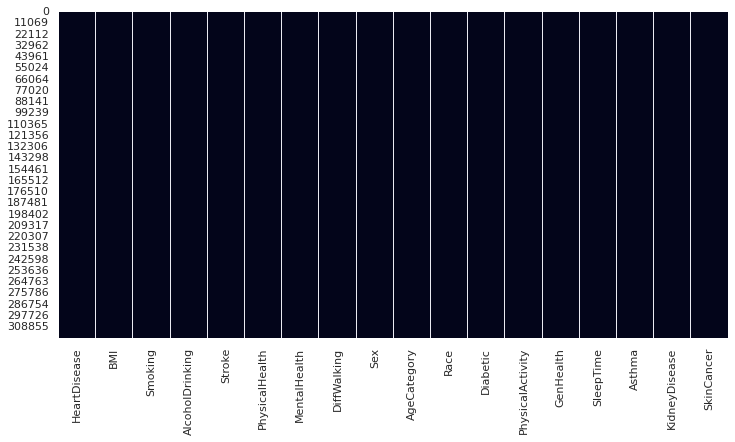

In [40]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df.isnull(),cbar=False)

##Outlier Handling

###BMI Outliers

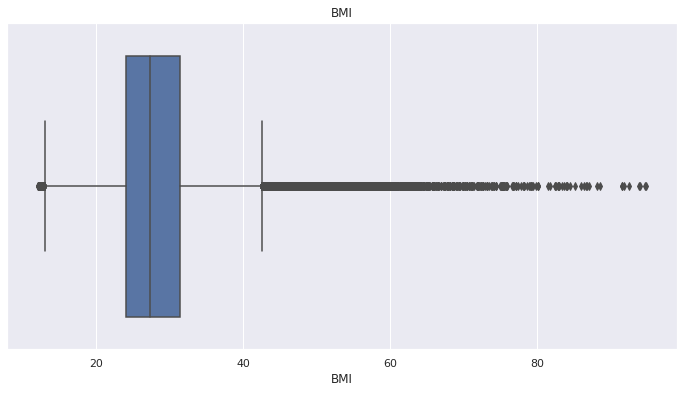

In [19]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(12,6)})
sns.boxplot(x='BMI',data=df)
plt.title('BMI')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

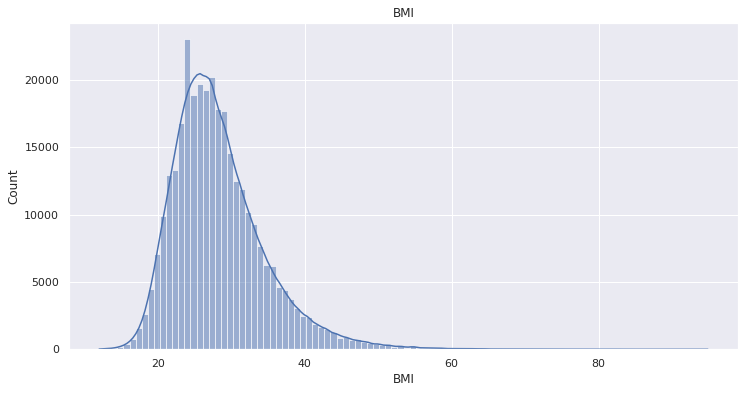

In [20]:
sns.histplot(df['BMI'],kde=True,bins=100)
plt.title('BMI')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Find outliers using IQR

In [21]:
def IQR_Calculator(column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR

  outliers_idx = df[(df[column_name]<lower_limit) | (df[column_name]>upper_limit)].index
  return outliers_idx

In [22]:
outliers_idx = IQR_Calculator('BMI')

Remove Outliers

In [27]:
df.drop(outliers_idx,axis=0,inplace=True)

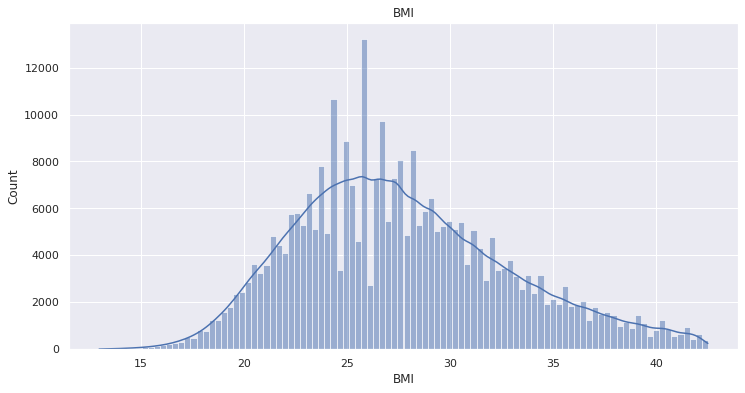

In [28]:
sns.histplot(df['BMI'],kde=True,bins=100)
plt.title('BMI')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

###SleepTime Outliers

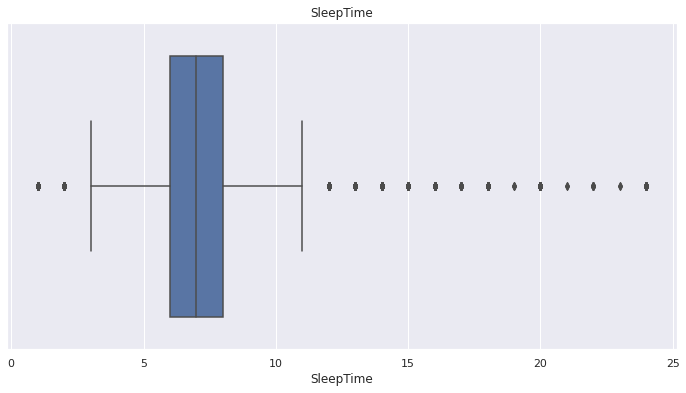

In [31]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(12,6)})
sns.boxplot(x='SleepTime',data=df)
plt.title('SleepTime')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

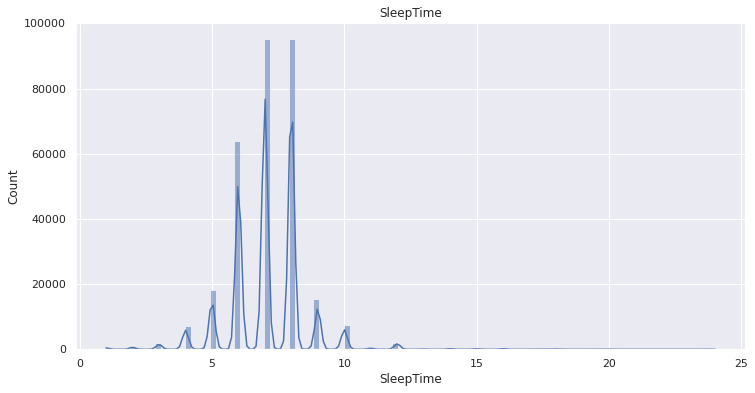

In [32]:
sns.histplot(df['SleepTime'],kde=True,bins=100)
plt.title('SleepTime')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Find Outliers using IQR

In [34]:
outliers_idx = IQR_Calculator('SleepTime')

Remove Outliers

In [35]:
df.drop(outliers_idx,axis=0,inplace=True)

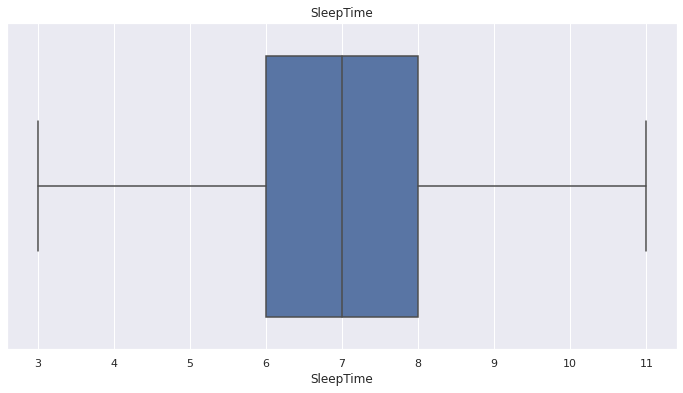

In [36]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(12,6)})
sns.boxplot(x='SleepTime',data=df)
plt.title('SleepTime')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

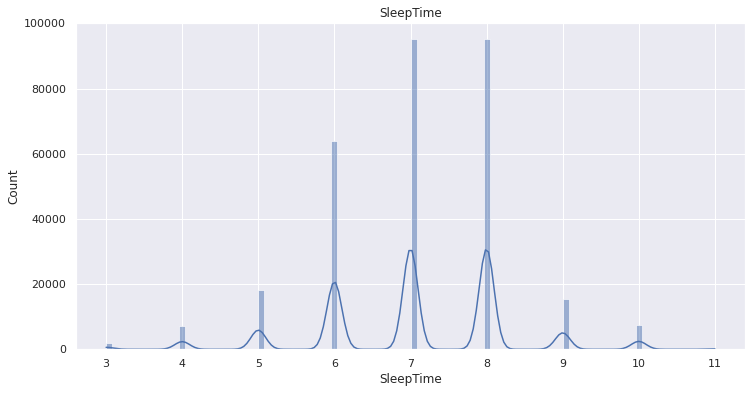

In [37]:
sns.histplot(df['SleepTime'],kde=True,bins=100)
plt.title('SleepTime')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

###h